In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt
import netCDF4 as cdf
import sys
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pylab as plb
from tm5tools import globarea
import calendar

In [3]:
##################################### Dataset Definition: Run1 - SiBCASA-GFED4 ###############################################

#co2_rbo_aircraft-pfp_26_representative.nc - Rio Branco
#co2_tab_aircraft-pfp_26_representative.nc - Tabatinga
#co2_san_aircraft-pfp_26_representative.nc - Santarem
#co2_alf_aircraft-pfp_26_representative.nc - Alta Floresta
#co2_mlo_surface-flask_1_representative.nc - Mauna Loa

#directories = ['/Storage/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/', #co2_tab_aircraft-pfp_26_representative.nc',
              #'/Storage/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/',#co2_tab_aircraft-pfp_26_representative.nc',
              #'/Storage/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/',#co2_tab_aircraft-pfp_26_representative.nc',
              #'/Storage/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/' #co2_tab_aircraft-pfp_26_representative.nc'
              #]

directories = [#'/Users/botia/mnt/promise/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_molefractions/',
              '/Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/', 
              #'/Users/botia/mnt/promise/CO2/botia/run3_FINN_optbg/analysis/data_molefractions/',
              #'/Users/botia/mnt/promise/CO2/botia/run4_casa_gfed4_optbg/analysis/data_molefractions/',
              #'/Users/botia/mnt/promise/CO2/botia/run5_casa_gfed4_3h_optbg/analysis/data_molefractions/' 
              ]


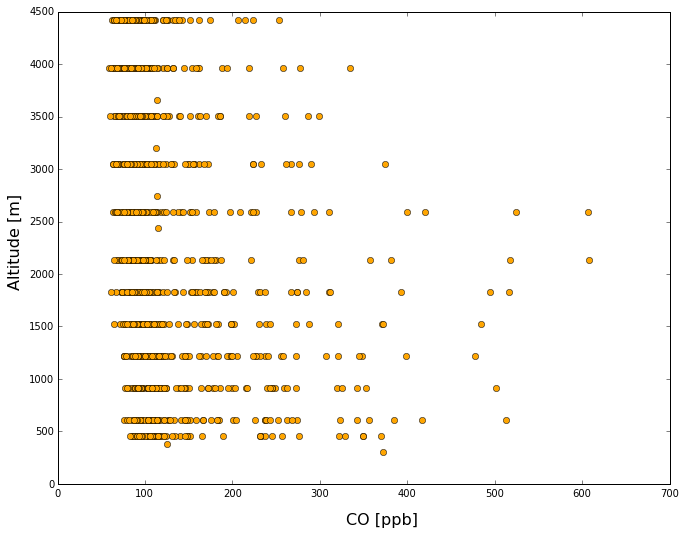

In [18]:
site = 'alf' # change to check all sites

fig,axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009,'CO [ppb]', ha='center',fontsize=16)
fig.text(-0.02, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=16)

colors = plt.get_cmap('gist_rainbow')(np.linspace(0,1,6))
dirbf = '/Users/botia/mnt/promise/CO2/ingrid/co_fwd_runs/sibcasa-gfed4/gatti_points_apri.nc4'
      
f = cdf.Dataset(dirbf)    
o = f.groups[site].groups['CO'].variables['obs_mix'][:]
s = f.groups[site].groups['CO'].variables['mod_mix'][:]
a = f.groups[site].groups['CO'].variables['alt'][:]
time = f.groups[site].groups['CO'].variables['dates'][:]
dates = []

for i in time:
    dates.append(dt.datetime(*i))
dates = np.array(dates)
                
date_min = dt.datetime(2010,1,1)
date_max = dt.datetime(2014,10,1)
                
d_index_all  = np.where(np.logical_and(dates >= date_min, dates < date_max))
        
obs = o[d_index_all]
sim = s[d_index_all]
alt = a[d_index_all]
                
index_500 = np.where(alt<500)

ax1 = plt.subplot(111)
ax1.plot(obs,alt,'o',color='orange')


0 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
(999,) 999 999 (999,)


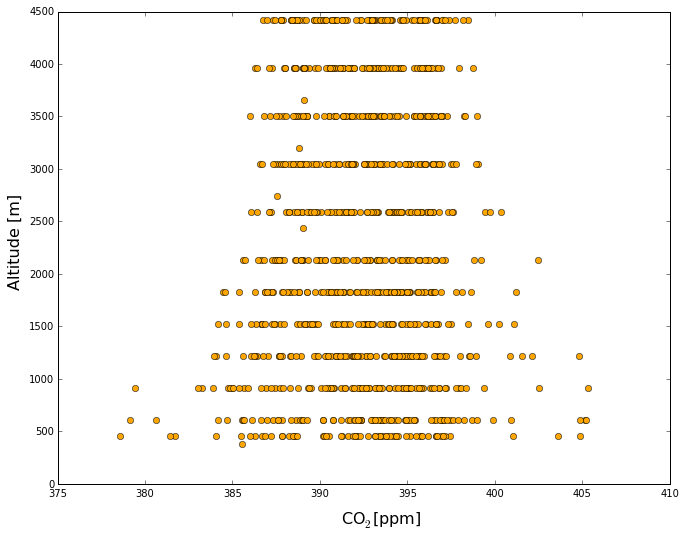

In [11]:
######################################## GFAS - Tabatinga

site = 'alf'

fig,axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009,'CO$_2$[ppm]', ha='center',fontsize=16)
fig.text(-0.02, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=16)

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        #print fname
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            msm = f_site.variables['modelsamplesmean'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
            
            date_min = dt.datetime(2010,1,1)
            date_max = dt.datetime(2014,10,1)
            d_index  = np.where(np.logical_and(dates >= date_min, dates < date_max))
            
            obs = o[d_index]
            alt = a[d_index]
         
    print shape(dates), len(obs), len(alt), shape(a)    
    
    ax1 = plt.subplot(111)
    ax1.plot(obs,alt,'o',color='orange')
    #ax1.set_ylim(0,5000)
    #fig.savefig('ObsSan2010-2014.png',bbox_inches='tight',DPI=1000)
    #ylim(dt.date(2014,1,1),dt.date(2014,8,1))
    #ax1.plot(o-s.sum(axis=1),a,'o')



0 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_tab_aircraft-pfp_26_representative.nc
(462,) (462,) (462, 7) (462,)


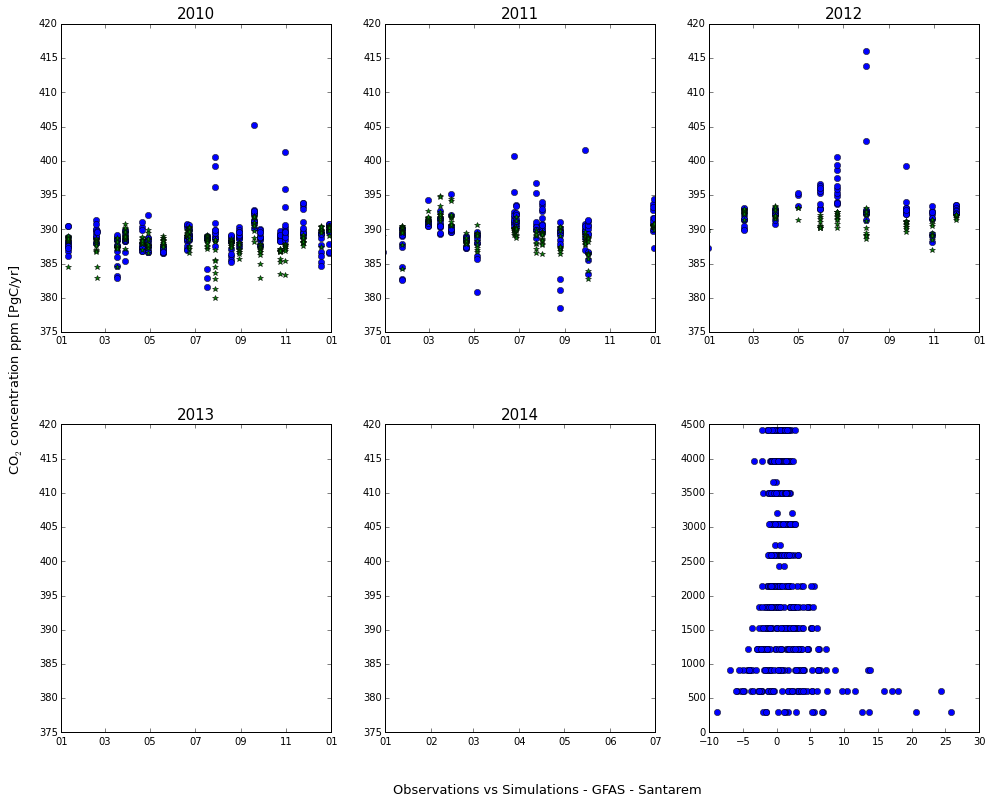

In [4]:
######################################## GFAS - Santarem
site = 'tab'

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009, 'Observations vs Simulations - GFAS - Santarem', ha='center',fontsize=13)
fig.text(0, 0.5, 'CO$_2$ concentration ppm [PgC/yr]', va='center', rotation='vertical',fontsize=13)

for ii,dirbf in enumerate(directories):
    
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            msm = f_site.variables['modelsamplesmean'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
    print shape(dates), shape(o), shape(s), shape(a)    

    ax1 = plt.subplot(231)
    ax1.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2010,1,1),dt.date(2011,1,1))
    ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax1.set_title('2010',fontsize=15)

    ax2 = plt.subplot(232)
    ax2.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2011,1,1),dt.date(2012,1,1))
    ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax2.set_title('2011',fontsize=15)

    ax3 = plt.subplot(233)
    ax3.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2012,1,1),dt.date(2013,1,1))
    ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax3.set_title('2012',fontsize=15)

    ax4 = plt.subplot(234)
    ax4.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2013,1,1),dt.date(2014,1,1))
    ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax4.set_title('2013',fontsize=15)

    ax5 = plt.subplot(235)
    ax5.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2014,1,1),dt.date(2014,7,1))
    ax5.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax5.set_title('2014',fontsize=15)
    
    ax6 = plt.subplot(236)
    #ax6.plot(o,a,'o')
    ax6.plot(o-s.sum(axis=1),a,'o')
    
    #legend = ['obs', 'sib', 'Gfa', 'finn', 'casa']
    #ax5.legend(legend[:ii+2],loc='center left', bbox_to_anchor=(1, 1.2))

    #leg = plt.gca().get_legend()
    #plt.legend()#(['Observations','SiBCASA-GFED4','GFAS'])#,'FINN','CASA-GFED4','CASA-GFED4-3h'])
    #plt.tight_layout()


0 /Users/botia/mnt/promise/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
(999,) (999,) (999, 7) (999,)


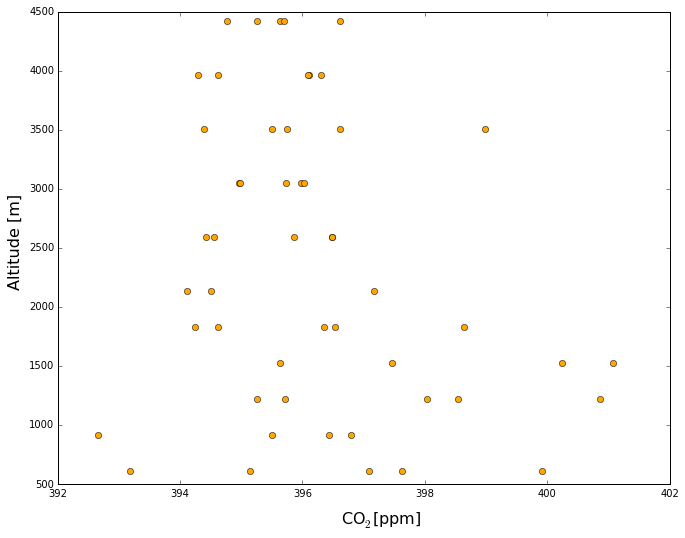

In [7]:
######################################## GFAS - Rio Branco
site = 'alf'

fig,axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(10,8))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009,'CO$_2$[ppm]', ha='center',fontsize=16)
fig.text(-0.02, 0.5, 'Altitude [m]', va='center', rotation='vertical',fontsize=16)

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        #print fname
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            msm = f_site.variables['modelsamplesmean'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
            
            date_min = dt.datetime(2013,8,1)
            date_max = dt.datetime(2013,12,1)
            d_index  = np.where(np.logical_and(dates >= date_min, dates < date_max))
            
            obs = o[d_index]
            alt = a[d_index]
                
            
            
    print shape(dates), shape(o), shape(s), shape(a)    

    
    ax1 = plt.subplot(111)
    ax1.plot(obs,alt,'o',color='orange')
    #fig.savefig('ObsSan2010-2014.png',bbox_inches='tight',DPI=1000)
    #ylim(dt.date(2014,1,1),dt.date(2014,8,1))
    #ax1.plot(o-s.sum(axis=1),a,'o')

In [10]:
dates
len(o)

3124

0 /Storage/CO2/botia/run2_GFAS_optbg/analysis/data_molefractions/
co2_alf_aircraft-pfp_26_representative.nc
(999,) (999,) (999, 7) (999,)


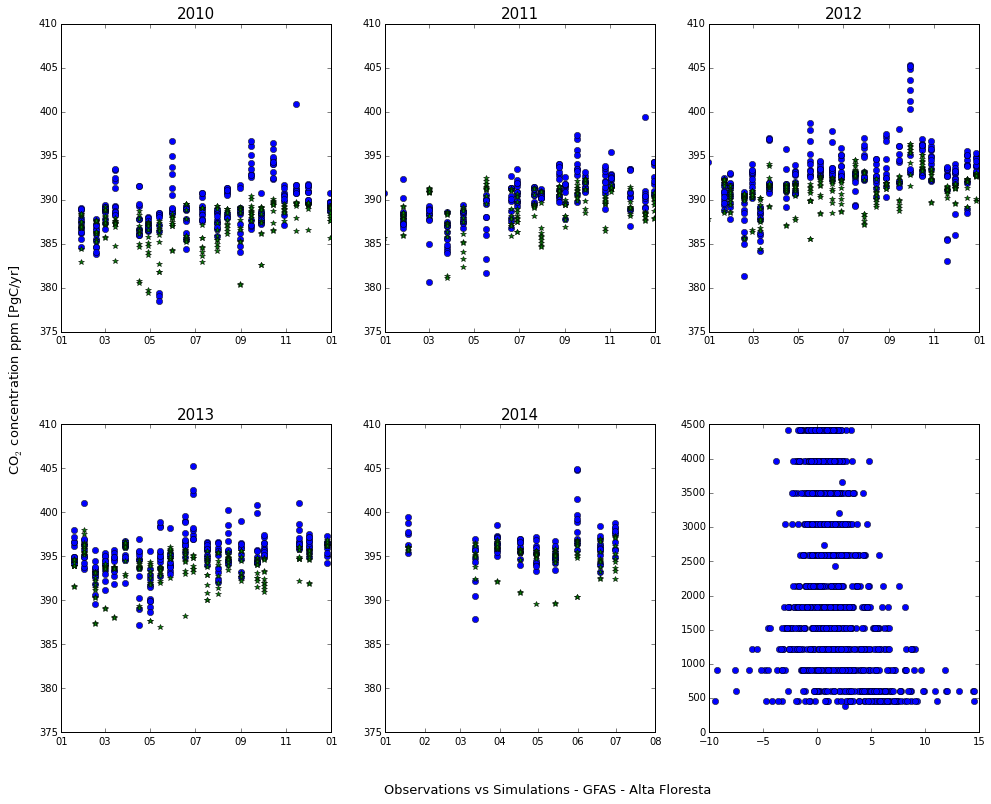

In [14]:
######################################## GFAS - Alta Floresta
site = 'alf'

fig,axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,12))
subplots_adjust(left=0.05, bottom=0.08, right=None, top=None, wspace=None, hspace=0.3)
fig.text(0.5, 0.009,'Observations vs Simulations - GFAS - Alta Floresta', ha='center',fontsize=13)
fig.text(0, 0.5, 'CO$_2$ concentration ppm [PgC/yr]', va='center', rotation='vertical',fontsize=13)

for ii,dirbf in enumerate(directories):
    print ii,dirbf
    #for y in range(minyear,maxyear):
    for fname in os.listdir(dirbf):
        #print fname
        if fname[4:7] == site:
            print fname
            f_site = cdf.Dataset(dirbf+fname)
            o = f_site.variables['value'][:]*1e6
            s = f_site.variables['modelsamplesensemble'][:]*1e6
            msm = f_site.variables['modelsamplesmean'][:]*1e6
            a = f_site.variables['altitude'][:]
            time = f_site.variables['time_components'][:]
            dates = []
            for i in time:
                dates.append(dt.datetime(*i))
            dates = np.array(dates)
    print shape(dates), shape(o), shape(s), shape(a)    
    
    
    ax1 = plt.subplot(231)
    ax1.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2010,1,1),dt.date(2011,1,1))
    ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax1.set_title('2010',fontsize=15)

    ax2 = plt.subplot(232)
    ax2.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2011,1,1),dt.date(2012,1,1))
    ax2.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax2.set_title('2011',fontsize=15)

    ax3 = plt.subplot(233)
    ax3.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2012,1,1),dt.date(2013,1,1))
    ax3.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax3.set_title('2012',fontsize=15)

    ax4 = plt.subplot(234)
    ax4.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2013,1,1),dt.date(2014,1,1))
    ax4.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax4.set_title('2013',fontsize=15)

    ax5 = plt.subplot(235)
    ax5.plot(dates,o,'o',dates,s.sum(axis=1),'*')
    xlim(dt.date(2014,1,1),dt.date(2014,8,1))
    ax5.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m'))
    ax5.set_title('2014',fontsize=15)
    
    ax6 = plt.subplot(236)
    #ax6.plot(o,a,'o')
    ax6.plot(o-s.sum(axis=1),a,'o')

In [77]:
plot(obs-sim.sum(axis=1),alt,'o')

AttributeError: 'list' object has no attribute 'sum'

In [9]:
sim.shape
fac = 12.*1.e15

In [10]:
bio = f2.variables['bio_flux_opt'][:]
ff = f2.variables['fossil_flux_imp'][:]
fire = f2.variables['fire_flux_imp'][:]

print shape(bio), shape(ff), type(bio), type(ff)

(1, 180, 360) (1, 180, 360) <type 'numpy.ndarray'> <type 'numpy.ndarray'>


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


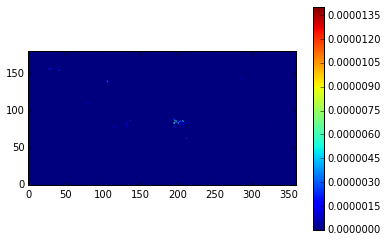

In [11]:
imshow(fire[0,:,:])
colorbar()
plt.gca().invert_yaxis()

In [12]:
f = cdf.Dataset('/Storage/CO2/botia/run1_sibcasa_gfed4_optbg/analysis/data_amazon_yearly/amazon_fluxes.2010.nc')


In [13]:
value = f.variables['fire_flux_imp'][:]*12/1e15*365*86400
value

array([[ 0.53683061]])